In [0]:
from google.colab import drive

In [2]:
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [3]:
!ls "/content/gdrive/My Drive/Omdena Creedix/data"

 area_income.ipynb	   'PDB All Provinces.xlsx'
'CUSTOMER BANK X.xlsx'	   'REGION vs AREA.xlsx'
 Job_Title.csv		    testing_percapitaincome.ipynb
 job_titles.ipynb	    transaction_creedix.ipynb
 PDB_All_Provinces.csv	    transaction_data.csv
 PDB_All_Provinces.gsheet   transactions.xlsx


In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [0]:
per_capita_income_data = '/content/gdrive/My Drive/Omdena Creedix/data/PDB_All_Provinces.csv'

In [0]:
data = pd.read_csv(per_capita_income_data,names= ['1997','1998','1999','2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016'])

In [7]:
data = data.dropna()
data = data.drop(data.index[0])
data.head()

,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
ACEH,128000,147000,171000,265000,300000,330000,425000,550000,620000,820000,850000,1000000,1200000,1300000,1350000,1400000,1550000,1750000,1900000.0,2118500
SUMATERA UTARA,151000,174000,210000,254000,340500,464000,505000,537000,600000,737794,761000,822205,905000,965000,1035500,1200000,1375000,1505850,1625000.0,1811875
SUMATERA BARAT,119000,137000,160000,200000,250000,385000,435000,480000,540000,650000,725000,800000,880000,940000,1055000,1150000,1350000,1490000,1615000.0,1800725
RIAU,151500,174000,218000,250700,329000,394000,437500,476900,551500,637000,710000,800000,901600,1016000,1120000,1238000,1400000,1700000,1878000.0,2095000
JAMBI,119500,137500,150000,173000,245000,304000,390000,425000,485000,563000,658000,724000,800000,900000,1028000,1142500,1300000,1502300,1710000.0,1906650


In [0]:
data = data.stack().reset_index().rename(columns={'level_0':'District','level_1':'Year',0:'Income'})

In [0]:
data.Income = data.Income.apply(lambda x: str(x).replace('-','')).fillna(0).replace('', np.nan).fillna(0).astype(float)

In [10]:
data.head()

,District,Year,Income
0,ACEH,1997,128000.0
1,ACEH,1998,147000.0
2,ACEH,1999,171000.0
3,ACEH,2000,265000.0
4,ACEH,2001,300000.0


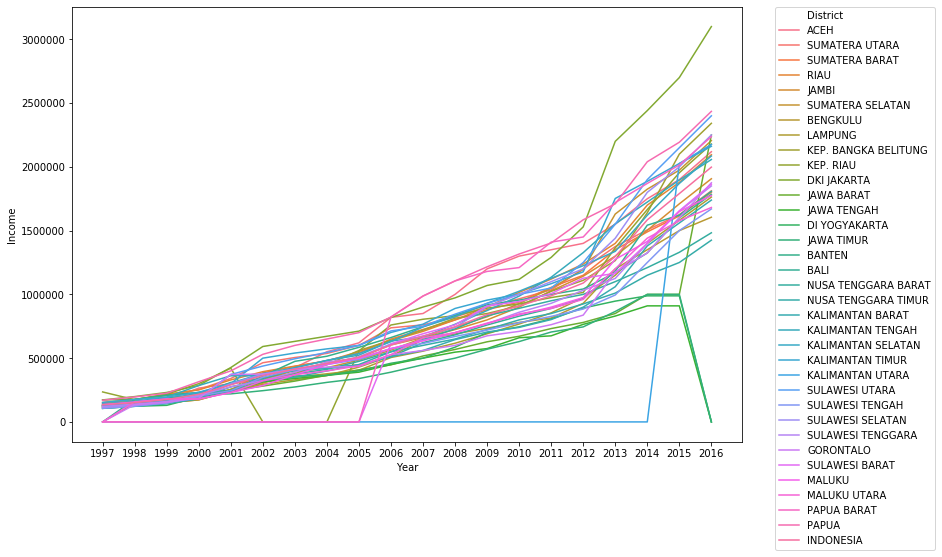

In [0]:
fig = plt.gcf()
fig.set_size_inches(12, 8)
legend_out = True
sns.lineplot(x='Year', y='Income', hue='District', data=data)
#plt.legend(loc='right')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [11]:
#five year per capita income 2012-2016
five_year = data[data['Year'] >'2011']
five_year.head(10)

,District,Year,Income
15,ACEH,2012,1400000.0
16,ACEH,2013,1550000.0
17,ACEH,2014,1750000.0
18,ACEH,2015,1900000.0
19,ACEH,2016,2118500.0
35,SUMATERA UTARA,2012,1200000.0
36,SUMATERA UTARA,2013,1375000.0
37,SUMATERA UTARA,2014,1505850.0
38,SUMATERA UTARA,2015,1625000.0
39,SUMATERA UTARA,2016,1811875.0


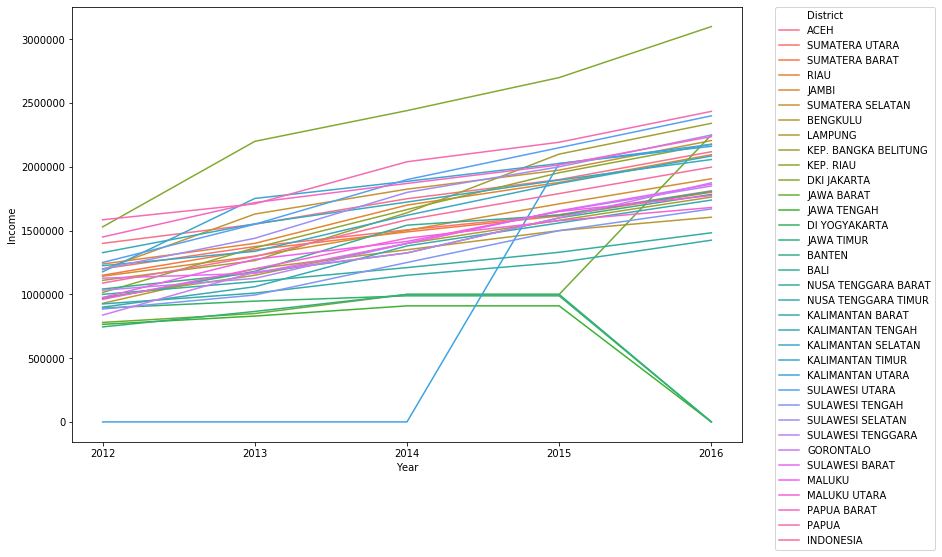

In [0]:
fig = plt.gcf()
fig.set_size_inches(12, 8)
legend_out = True
sns.lineplot(x='Year', y='Income', hue='District', data=five_year)
#plt.legend(loc='right')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [0]:
#Looking to get a per capita income score based on previous 5 years per capita income data.
median_income = five_year.groupby(['District'])['Income'].median()

In [13]:
median_income

District
ACEH                    1750000.0
BALI                    1542600.0
BANTEN                  1325000.0
BENGKULU                1350000.0
DI YOGYAKARTA            947114.0
DKI JAKARTA             2441000.0
GORONTALO               1325000.0
INDONESIA               1584391.0
JAMBI                   1502300.0
JAWA BARAT              1000000.0
JAWA TENGAH              830000.0
JAWA TIMUR               866250.0
KALIMANTAN BARAT        1380000.0
KALIMANTAN SELATAN      1620000.0
KALIMANTAN TENGAH       1723970.0
KALIMANTAN TIMUR        1886315.0
KALIMANTAN UTARA              0.0
KEP. BANGKA BELITUNG    1640000.0
KEP. RIAU               1665000.0
LAMPUNG                 1399037.0
MALUKU                  1415000.0
MALUKU UTARA            1440746.0
NUSA TENGGARA BARAT     1210000.0
NUSA TENGGARA TIMUR     1150000.0
PAPUA                   2040000.0
PAPUA BARAT             1870000.0
RIAU                    1700000.0
SULAWESI BARAT          1400000.0
SULAWESI SELATAN        1800000.0
SULAW

In [0]:
data = {'District': ['ACEH','BALI','BANTEN','BENGKULU','DI YOGYAKARTA','DKI JAKARTA','GORONTALO','INDONESIA','JAMBI','JAWA BARAT','JAWA TENGAH','JAWA TIMUR','KALIMANTAN BARAT','KALIMANTAN SELATAN','KALIMANTAN TENGAH','KALIMANTAN TIMUR',
                      'KALIMANTAN UTARA','KEP. BANGKA BELITUNG','KEP. RIAU','LAMPUNG','MALUKU','MALUKU UTARA','NUSA TENGGARA BARAT','NUSA TENGGARA TIMUR','PAPUA','PAPUA BARAT','RIAU','SULAWESI BARAT','SULAWESI SELATAN',
                      'SULAWESI TENGAH','SULAWESI TENGGARA','SULAWESI UTARA','SUMATERA BARAT','SUMATERA SELATAN','SUMATERA UTARA'], 'Median':[1750000., 1542600., 1325000., 1350000.,  947114., 2441000.,
        1325000., 1584391., 1502300., 1000000.,  830000.,  866250.,
        1380000., 1620000., 1723970., 1886315.,       0., 1640000.,
        1665000., 1399037., 1415000., 1440746., 1210000., 1150000.,
        2040000., 1870000., 1700000., 1400000., 1800000., 1250000.,
        1400000., 1900000., 1490000., 1825000., 1505850.]}

In [15]:
df = pd.DataFrame(data)
df.head()

,District,Median
0,ACEH,1750000.0
1,BALI,1542600.0
2,BANTEN,1325000.0
3,BENGKULU,1350000.0
4,DI YOGYAKARTA,947114.0


In [0]:
df['pci_score'] = df.apply(lambda x: (x['Median']/1000000.0),axis=1)
df['pci_score'] = df['pci_score'].apply(np.ceil)

In [17]:
df.head()

,District,Median,pci_score
0,ACEH,1750000.0,2.0
1,BALI,1542600.0,2.0
2,BANTEN,1325000.0,2.0
3,BENGKULU,1350000.0,2.0
4,DI YOGYAKARTA,947114.0,1.0


In [0]:
area_district = df.drop(['Median'],axis=1)

In [0]:
five_year = pd.merge(five_year, df, on='District')

In [20]:
five_year.head()

,District,Year,Income,Median,pci_score
0,ACEH,2012,1400000.0,1750000.0,2.0
1,ACEH,2013,1550000.0,1750000.0,2.0
2,ACEH,2014,1750000.0,1750000.0,2.0
3,ACEH,2015,1900000.0,1750000.0,2.0
4,ACEH,2016,2118500.0,1750000.0,2.0


In [0]:
#only get the districts with the PCI score
area_district = five_year.drop(['Year','Income','Median'],axis=1)

In [22]:
area_district.head(15)

,District,pci_score
0,ACEH,2.0
1,ACEH,2.0
2,ACEH,2.0
3,ACEH,2.0
4,ACEH,2.0
5,SUMATERA UTARA,2.0
6,SUMATERA UTARA,2.0
7,SUMATERA UTARA,2.0
8,SUMATERA UTARA,2.0
9,SUMATERA UTARA,2.0


In [0]:
transactions_data = '/content/gdrive/My Drive/Omdena Creedix/data/transaction_data.csv'

In [0]:
trans = pd.read_csv(transactions_data)

In [25]:
trans.head()

,CIF_NO,TRX_DATE,RECID,TIME,ACCOUNT_NO,AT_CHG_CODE,AT_CHG_DESC,CHANNEL,CHANNEL2,CATEGORY,DETAIL_CATEGORY,ISSUER,STATUS,AREA_ACCOUNT,REGION_ACCOUNT,AMT_TRX
0,75227151,2019-10-16,FT19289WB8FL;1,14:57,7036330313,40111917,TRF BANKX TO PRIMA - BANKXMOBILE,MOBILE,MOBILE,TRANSFER,TRANSFER PRIMA,0,YES,AREA BALIKPAPAN,REGION VII/ BANJARMASIN,670000.0
1,75227151,2019-10-09,FT192827FX5M;1,16:05,7036330313,40111117,TRF BANKX TO BANKX - BANKXMOBILE,MOBILE,MOBILE,TRANSFER,TRANSFER PINBUK,0,YES,AREA BALIKPAPAN,REGION VII/ BANJARMASIN,20000.0
2,75227151,2019-10-25,FT19298TCCWJ;1,20:31,7036330313,40111117,TRF BANKX TO BANKX - BANKXMOBILE,MOBILE,MOBILE,TRANSFER,TRANSFER PINBUK,0,YES,AREA BALIKPAPAN,REGION VII/ BANJARMASIN,186000.0
3,75227151,2019-10-08,FT19281B8Y42;1,19:21,7036330313,40111117,TRF BANKX TO BANKX - BANKXMOBILE,MOBILE,MOBILE,TRANSFER,TRANSFER PINBUK,0,YES,AREA BALIKPAPAN,REGION VII/ BANJARMASIN,70000.0
4,75227151,2019-10-09,FT19282XLLMN;1,07:28,7036330313,40111117,TRF BANKX TO BANKX - BANKXMOBILE,MOBILE,MOBILE,TRANSFER,TRANSFER PINBUK,0,YES,AREA BALIKPAPAN,REGION VII/ BANJARMASIN,40000.0


In [0]:
def get_area(x):
  return x.split('/ ')[1]

In [0]:
trans['AREA'] = trans.apply(lambda row : get_area(row['REGION_ACCOUNT']), axis=1)

In [28]:
trans.head()

,CIF_NO,TRX_DATE,RECID,TIME,ACCOUNT_NO,AT_CHG_CODE,AT_CHG_DESC,CHANNEL,CHANNEL2,CATEGORY,DETAIL_CATEGORY,ISSUER,STATUS,AREA_ACCOUNT,REGION_ACCOUNT,AMT_TRX,AREA
0,75227151,2019-10-16,FT19289WB8FL;1,14:57,7036330313,40111917,TRF BANKX TO PRIMA - BANKXMOBILE,MOBILE,MOBILE,TRANSFER,TRANSFER PRIMA,0,YES,AREA BALIKPAPAN,REGION VII/ BANJARMASIN,670000.0,BANJARMASIN
1,75227151,2019-10-09,FT192827FX5M;1,16:05,7036330313,40111117,TRF BANKX TO BANKX - BANKXMOBILE,MOBILE,MOBILE,TRANSFER,TRANSFER PINBUK,0,YES,AREA BALIKPAPAN,REGION VII/ BANJARMASIN,20000.0,BANJARMASIN
2,75227151,2019-10-25,FT19298TCCWJ;1,20:31,7036330313,40111117,TRF BANKX TO BANKX - BANKXMOBILE,MOBILE,MOBILE,TRANSFER,TRANSFER PINBUK,0,YES,AREA BALIKPAPAN,REGION VII/ BANJARMASIN,186000.0,BANJARMASIN
3,75227151,2019-10-08,FT19281B8Y42;1,19:21,7036330313,40111117,TRF BANKX TO BANKX - BANKXMOBILE,MOBILE,MOBILE,TRANSFER,TRANSFER PINBUK,0,YES,AREA BALIKPAPAN,REGION VII/ BANJARMASIN,70000.0,BANJARMASIN
4,75227151,2019-10-09,FT19282XLLMN;1,07:28,7036330313,40111117,TRF BANKX TO BANKX - BANKXMOBILE,MOBILE,MOBILE,TRANSFER,TRANSFER PINBUK,0,YES,AREA BALIKPAPAN,REGION VII/ BANJARMASIN,40000.0,BANJARMASIN


In [29]:
trans.groupby(['AREA']).count()

,CIF_NO,TRX_DATE,RECID,TIME,ACCOUNT_NO,AT_CHG_CODE,AT_CHG_DESC,CHANNEL,CHANNEL2,CATEGORY,DETAIL_CATEGORY,ISSUER,STATUS,AREA_ACCOUNT,REGION_ACCOUNT,AMT_TRX
AREA,,,,,,,,,,,,,,,,
BANDUNG,70456,70456,70456,70456,70456,70456,70065,70456,70449,69869,69869,59323,69868,70456,70456,70456
BANJARMASIN,56026,56026,56026,56026,56026,56026,55852,56026,56026,55798,55798,52428,55796,56026,56026,56026
JAKARTA,321230,321230,321230,321230,321230,321230,320533,321230,321228,320110,320110,273967,320110,321230,321230,321230
MAKASSAR,63153,63153,63153,63153,63153,63153,62989,63153,63153,62914,62914,57538,62914,63153,63153,63153
MEDAN,117489,117489,117489,117489,117489,117489,116540,116956,116956,116339,116339,106725,116339,117489,117489,117489
PALEMBANG,72410,72410,72410,72410,72410,72410,71321,72410,72409,70964,70964,64600,70963,72410,72410,72410
SEMARANG,75857,75857,75857,75857,75857,75857,75362,75857,75857,75303,75303,66247,75303,75857,75857,75857
SURABAYA,90050,90050,90050,90050,90050,90050,89930,90049,90049,89876,89876,78967,89875,90050,90050,90050


In [30]:
trans.groupby('AREA')['CIF_NO'].nunique()

AREA
BANDUNG         769
BANJARMASIN     604
JAKARTA        3157
MAKASSAR        637
MEDAN          1264
PALEMBANG       852
SEMARANG        873
SURABAYA       1044
Name: CIF_NO, dtype: int64

In [0]:
data = {'AREA': ['BANDUNG','BANJARMASIN','JAKARTA','MAKASSAR','MEDAN','PALEMBANG','SEMARANG','SURABAYA'], 'District':['Jawa Barat','KALIMANTAN SELATAN','DKI JAKARTA','SUMATERA SELATAN',
                                                                                                                      'SUMATERA UTARA','SUMATERA SELATAN','Jawa','Jawa Timur']}

In [32]:
df = pd.DataFrame(data)
df.head()

,AREA,District
0,BANDUNG,Jawa Barat
1,BANJARMASIN,KALIMANTAN SELATAN
2,JAKARTA,DKI JAKARTA
3,MAKASSAR,SUMATERA SELATAN
4,MEDAN,SUMATERA UTARA


In [0]:
trans_area = pd.merge(trans,df, on='AREA')

In [34]:
trans_area.head()

,CIF_NO,TRX_DATE,RECID,TIME,ACCOUNT_NO,AT_CHG_CODE,AT_CHG_DESC,CHANNEL,CHANNEL2,CATEGORY,DETAIL_CATEGORY,ISSUER,STATUS,AREA_ACCOUNT,REGION_ACCOUNT,AMT_TRX,AREA,District
0,75227151,2019-10-16,FT19289WB8FL;1,14:57,7036330313,40111917,TRF BANKX TO PRIMA - BANKXMOBILE,MOBILE,MOBILE,TRANSFER,TRANSFER PRIMA,0,YES,AREA BALIKPAPAN,REGION VII/ BANJARMASIN,670000.0,BANJARMASIN,KALIMANTAN SELATAN
1,75227151,2019-10-09,FT192827FX5M;1,16:05,7036330313,40111117,TRF BANKX TO BANKX - BANKXMOBILE,MOBILE,MOBILE,TRANSFER,TRANSFER PINBUK,0,YES,AREA BALIKPAPAN,REGION VII/ BANJARMASIN,20000.0,BANJARMASIN,KALIMANTAN SELATAN
2,75227151,2019-10-25,FT19298TCCWJ;1,20:31,7036330313,40111117,TRF BANKX TO BANKX - BANKXMOBILE,MOBILE,MOBILE,TRANSFER,TRANSFER PINBUK,0,YES,AREA BALIKPAPAN,REGION VII/ BANJARMASIN,186000.0,BANJARMASIN,KALIMANTAN SELATAN
3,75227151,2019-10-08,FT19281B8Y42;1,19:21,7036330313,40111117,TRF BANKX TO BANKX - BANKXMOBILE,MOBILE,MOBILE,TRANSFER,TRANSFER PINBUK,0,YES,AREA BALIKPAPAN,REGION VII/ BANJARMASIN,70000.0,BANJARMASIN,KALIMANTAN SELATAN
4,75227151,2019-10-09,FT19282XLLMN;1,07:28,7036330313,40111117,TRF BANKX TO BANKX - BANKXMOBILE,MOBILE,MOBILE,TRANSFER,TRANSFER PINBUK,0,YES,AREA BALIKPAPAN,REGION VII/ BANJARMASIN,40000.0,BANJARMASIN,KALIMANTAN SELATAN


In [0]:
trans_area = pd.merge(trans_area,area_district,on='District')

In [36]:
trans_area.head()

,CIF_NO,TRX_DATE,RECID,TIME,ACCOUNT_NO,AT_CHG_CODE,AT_CHG_DESC,CHANNEL,CHANNEL2,CATEGORY,DETAIL_CATEGORY,ISSUER,STATUS,AREA_ACCOUNT,REGION_ACCOUNT,AMT_TRX,AREA,District,pci_score
0,75227151,2019-10-16,FT19289WB8FL;1,14:57,7036330313,40111917,TRF BANKX TO PRIMA - BANKXMOBILE,MOBILE,MOBILE,TRANSFER,TRANSFER PRIMA,0,YES,AREA BALIKPAPAN,REGION VII/ BANJARMASIN,670000.0,BANJARMASIN,KALIMANTAN SELATAN,2.0
1,75227151,2019-10-16,FT19289WB8FL;1,14:57,7036330313,40111917,TRF BANKX TO PRIMA - BANKXMOBILE,MOBILE,MOBILE,TRANSFER,TRANSFER PRIMA,0,YES,AREA BALIKPAPAN,REGION VII/ BANJARMASIN,670000.0,BANJARMASIN,KALIMANTAN SELATAN,2.0
2,75227151,2019-10-16,FT19289WB8FL;1,14:57,7036330313,40111917,TRF BANKX TO PRIMA - BANKXMOBILE,MOBILE,MOBILE,TRANSFER,TRANSFER PRIMA,0,YES,AREA BALIKPAPAN,REGION VII/ BANJARMASIN,670000.0,BANJARMASIN,KALIMANTAN SELATAN,2.0
3,75227151,2019-10-16,FT19289WB8FL;1,14:57,7036330313,40111917,TRF BANKX TO PRIMA - BANKXMOBILE,MOBILE,MOBILE,TRANSFER,TRANSFER PRIMA,0,YES,AREA BALIKPAPAN,REGION VII/ BANJARMASIN,670000.0,BANJARMASIN,KALIMANTAN SELATAN,2.0
4,75227151,2019-10-16,FT19289WB8FL;1,14:57,7036330313,40111917,TRF BANKX TO PRIMA - BANKXMOBILE,MOBILE,MOBILE,TRANSFER,TRANSFER PRIMA,0,YES,AREA BALIKPAPAN,REGION VII/ BANJARMASIN,670000.0,BANJARMASIN,KALIMANTAN SELATAN,2.0


In [37]:
trans_area.groupby(['pci_score','AREA'])['CIF_NO'].nunique()

pci_score  AREA       
2.0        BANJARMASIN     604
           MAKASSAR        637
           MEDAN          1264
           PALEMBANG       852
3.0        JAKARTA        3157
Name: CIF_NO, dtype: int64

In [0]:
job_title = '/content/gdrive/My Drive/Omdena Creedix/data/Job_Title.csv'

In [0]:
job = pd.read_csv(job_title)

In [40]:
job.columns

Index(['CIF_NO', 'Job Title'], dtype='object')

In [41]:
job.dtypes

CIF_NO       float64
Job Title     object
dtype: object

In [42]:
job.head()

,CIF_NO,Job Title
0,73122693.0,Area Manager
1,73152323.0,Regional Business Strategy & Support Manager
2,73171319.0,Posting Control Officer
3,73266627.0,Professional Staff
4,73266639.0,Head Office Audit Department Head


In [43]:
job.isna().sum()

CIF_NO       1
Job Title    0
dtype: int64

In [0]:
job = job.dropna()

In [0]:
job["CIF_NO"] = job["CIF_NO"].astype(int)

In [46]:
job.dtypes

CIF_NO        int64
Job Title    object
dtype: object

In [0]:
job_merge = pd.merge(trans_area, job, on='CIF_NO')

In [48]:
job_merge.head()

,CIF_NO,TRX_DATE,RECID,TIME,ACCOUNT_NO,AT_CHG_CODE,AT_CHG_DESC,CHANNEL,CHANNEL2,CATEGORY,DETAIL_CATEGORY,ISSUER,STATUS,AREA_ACCOUNT,REGION_ACCOUNT,AMT_TRX,AREA,District,pci_score,Job Title
0,75227151,2019-10-16,FT19289WB8FL;1,14:57,7036330313,40111917,TRF BANKX TO PRIMA - BANKXMOBILE,MOBILE,MOBILE,TRANSFER,TRANSFER PRIMA,0,YES,AREA BALIKPAPAN,REGION VII/ BANJARMASIN,670000.0,BANJARMASIN,KALIMANTAN SELATAN,2.0,Pawning Staff
1,75227151,2019-10-16,FT19289WB8FL;1,14:57,7036330313,40111917,TRF BANKX TO PRIMA - BANKXMOBILE,MOBILE,MOBILE,TRANSFER,TRANSFER PRIMA,0,YES,AREA BALIKPAPAN,REGION VII/ BANJARMASIN,670000.0,BANJARMASIN,KALIMANTAN SELATAN,2.0,Pawning Staff
2,75227151,2019-10-16,FT19289WB8FL;1,14:57,7036330313,40111917,TRF BANKX TO PRIMA - BANKXMOBILE,MOBILE,MOBILE,TRANSFER,TRANSFER PRIMA,0,YES,AREA BALIKPAPAN,REGION VII/ BANJARMASIN,670000.0,BANJARMASIN,KALIMANTAN SELATAN,2.0,Pawning Staff
3,75227151,2019-10-16,FT19289WB8FL;1,14:57,7036330313,40111917,TRF BANKX TO PRIMA - BANKXMOBILE,MOBILE,MOBILE,TRANSFER,TRANSFER PRIMA,0,YES,AREA BALIKPAPAN,REGION VII/ BANJARMASIN,670000.0,BANJARMASIN,KALIMANTAN SELATAN,2.0,Pawning Staff
4,75227151,2019-10-16,FT19289WB8FL;1,14:57,7036330313,40111917,TRF BANKX TO PRIMA - BANKXMOBILE,MOBILE,MOBILE,TRANSFER,TRANSFER PRIMA,0,YES,AREA BALIKPAPAN,REGION VII/ BANJARMASIN,670000.0,BANJARMASIN,KALIMANTAN SELATAN,2.0,Pawning Staff


In [49]:
job_merge.isna().sum()

CIF_NO                  0
TRX_DATE                0
RECID                   0
TIME                    0
ACCOUNT_NO              0
AT_CHG_CODE             0
AT_CHG_DESC         15365
CHANNEL              2665
CHANNEL2             2680
CATEGORY            20915
DETAIL_CATEGORY     20915
ISSUER             375250
STATUS              20930
AREA_ACCOUNT            0
REGION_ACCOUNT          0
AMT_TRX                 0
AREA                    0
District                0
pci_score               0
Job Title               0
dtype: int64

In [55]:
job_merge.shape

(2776275, 20)

In [0]:
job_merge =  job_merge.dropna()

In [51]:
job_merge.head()

,CIF_NO,TRX_DATE,RECID,TIME,ACCOUNT_NO,AT_CHG_CODE,AT_CHG_DESC,CHANNEL,CHANNEL2,CATEGORY,DETAIL_CATEGORY,ISSUER,STATUS,AREA_ACCOUNT,REGION_ACCOUNT,AMT_TRX,AREA,District,pci_score,Job Title
0,75227151,2019-10-16,FT19289WB8FL;1,14:57,7036330313,40111917,TRF BANKX TO PRIMA - BANKXMOBILE,MOBILE,MOBILE,TRANSFER,TRANSFER PRIMA,0,YES,AREA BALIKPAPAN,REGION VII/ BANJARMASIN,670000.0,BANJARMASIN,KALIMANTAN SELATAN,2.0,Pawning Staff
1,75227151,2019-10-16,FT19289WB8FL;1,14:57,7036330313,40111917,TRF BANKX TO PRIMA - BANKXMOBILE,MOBILE,MOBILE,TRANSFER,TRANSFER PRIMA,0,YES,AREA BALIKPAPAN,REGION VII/ BANJARMASIN,670000.0,BANJARMASIN,KALIMANTAN SELATAN,2.0,Pawning Staff
2,75227151,2019-10-16,FT19289WB8FL;1,14:57,7036330313,40111917,TRF BANKX TO PRIMA - BANKXMOBILE,MOBILE,MOBILE,TRANSFER,TRANSFER PRIMA,0,YES,AREA BALIKPAPAN,REGION VII/ BANJARMASIN,670000.0,BANJARMASIN,KALIMANTAN SELATAN,2.0,Pawning Staff
3,75227151,2019-10-16,FT19289WB8FL;1,14:57,7036330313,40111917,TRF BANKX TO PRIMA - BANKXMOBILE,MOBILE,MOBILE,TRANSFER,TRANSFER PRIMA,0,YES,AREA BALIKPAPAN,REGION VII/ BANJARMASIN,670000.0,BANJARMASIN,KALIMANTAN SELATAN,2.0,Pawning Staff
4,75227151,2019-10-16,FT19289WB8FL;1,14:57,7036330313,40111917,TRF BANKX TO PRIMA - BANKXMOBILE,MOBILE,MOBILE,TRANSFER,TRANSFER PRIMA,0,YES,AREA BALIKPAPAN,REGION VII/ BANJARMASIN,670000.0,BANJARMASIN,KALIMANTAN SELATAN,2.0,Pawning Staff


In [52]:
job_merge.isna().sum()

CIF_NO             0
TRX_DATE           0
RECID              0
TIME               0
ACCOUNT_NO         0
AT_CHG_CODE        0
AT_CHG_DESC        0
CHANNEL            0
CHANNEL2           0
CATEGORY           0
DETAIL_CATEGORY    0
ISSUER             0
STATUS             0
AREA_ACCOUNT       0
REGION_ACCOUNT     0
AMT_TRX            0
AREA               0
District           0
pci_score          0
Job Title          0
dtype: int64

In [54]:
job_merge.shape

(2776275, 20)

In [53]:
job_merge.groupby('Job Title')['CIF_NO'].nunique()

Job Title
ALMA Officer                             1
ATM & SSPP Operations Section Head       1
ATM & SSPP Operations Staff              2
ATM Cash Reconsiliation Section Head     1
ATM Cash Reconsiliation Staff            1
                                        ..
Wholesale Risk Officer                  15
Wholesale Specialist                     1
Withholding Tax Section Head             1
Withholding Tax Staff                    2
Workforce Planning Analyst               1
Name: CIF_NO, Length: 742, dtype: int64

In [56]:
job_merge.groupby('Job Title')['CIF_NO'].count()

Job Title
ALMA Officer                             470
ATM & SSPP Operations Section Head       380
ATM & SSPP Operations Staff              760
ATM Cash Reconsiliation Section Head     520
ATM Cash Reconsiliation Staff            625
                                        ... 
Wholesale Risk Officer                  7010
Wholesale Specialist                     450
Withholding Tax Section Head             445
Withholding Tax Staff                    730
Workforce Planning Analyst               525
Name: CIF_NO, Length: 742, dtype: int64

In [0]:
job_merge['Is_Management'] = np.where(((job_merge['Job Title'].str.contains('manager', case=False) == True) | (job_merge['Job Title'].str.contains('team leader', case=False) == True)
                                   | (job_merge['Job Title'].str.contains('head', case=False) == True)) , 1, 0)

In [58]:
job_merge.head()

,CIF_NO,TRX_DATE,RECID,TIME,ACCOUNT_NO,AT_CHG_CODE,AT_CHG_DESC,CHANNEL,CHANNEL2,CATEGORY,DETAIL_CATEGORY,ISSUER,STATUS,AREA_ACCOUNT,REGION_ACCOUNT,AMT_TRX,AREA,District,pci_score,Job Title,Is_Management
0,75227151,2019-10-16,FT19289WB8FL;1,14:57,7036330313,40111917,TRF BANKX TO PRIMA - BANKXMOBILE,MOBILE,MOBILE,TRANSFER,TRANSFER PRIMA,0,YES,AREA BALIKPAPAN,REGION VII/ BANJARMASIN,670000.0,BANJARMASIN,KALIMANTAN SELATAN,2.0,Pawning Staff,0
1,75227151,2019-10-16,FT19289WB8FL;1,14:57,7036330313,40111917,TRF BANKX TO PRIMA - BANKXMOBILE,MOBILE,MOBILE,TRANSFER,TRANSFER PRIMA,0,YES,AREA BALIKPAPAN,REGION VII/ BANJARMASIN,670000.0,BANJARMASIN,KALIMANTAN SELATAN,2.0,Pawning Staff,0
2,75227151,2019-10-16,FT19289WB8FL;1,14:57,7036330313,40111917,TRF BANKX TO PRIMA - BANKXMOBILE,MOBILE,MOBILE,TRANSFER,TRANSFER PRIMA,0,YES,AREA BALIKPAPAN,REGION VII/ BANJARMASIN,670000.0,BANJARMASIN,KALIMANTAN SELATAN,2.0,Pawning Staff,0
3,75227151,2019-10-16,FT19289WB8FL;1,14:57,7036330313,40111917,TRF BANKX TO PRIMA - BANKXMOBILE,MOBILE,MOBILE,TRANSFER,TRANSFER PRIMA,0,YES,AREA BALIKPAPAN,REGION VII/ BANJARMASIN,670000.0,BANJARMASIN,KALIMANTAN SELATAN,2.0,Pawning Staff,0
4,75227151,2019-10-16,FT19289WB8FL;1,14:57,7036330313,40111917,TRF BANKX TO PRIMA - BANKXMOBILE,MOBILE,MOBILE,TRANSFER,TRANSFER PRIMA,0,YES,AREA BALIKPAPAN,REGION VII/ BANJARMASIN,670000.0,BANJARMASIN,KALIMANTAN SELATAN,2.0,Pawning Staff,0


In [59]:
job_merge.groupby('Is_Management')['CIF_NO'].count()

Is_Management
0    1737385
1    1038890
Name: CIF_NO, dtype: int64

In [0]:
job_merge.set_index("CIF_NO", inplace = True)

In [61]:
job_merge.head()

,TRX_DATE,RECID,TIME,ACCOUNT_NO,AT_CHG_CODE,AT_CHG_DESC,CHANNEL,CHANNEL2,CATEGORY,DETAIL_CATEGORY,ISSUER,STATUS,AREA_ACCOUNT,REGION_ACCOUNT,AMT_TRX,AREA,District,pci_score,Job Title,Is_Management
CIF_NO,,,,,,,,,,,,,,,,,,,,
75227151,2019-10-16,FT19289WB8FL;1,14:57,7036330313,40111917,TRF BANKX TO PRIMA - BANKXMOBILE,MOBILE,MOBILE,TRANSFER,TRANSFER PRIMA,0,YES,AREA BALIKPAPAN,REGION VII/ BANJARMASIN,670000.0,BANJARMASIN,KALIMANTAN SELATAN,2.0,Pawning Staff,0
75227151,2019-10-16,FT19289WB8FL;1,14:57,7036330313,40111917,TRF BANKX TO PRIMA - BANKXMOBILE,MOBILE,MOBILE,TRANSFER,TRANSFER PRIMA,0,YES,AREA BALIKPAPAN,REGION VII/ BANJARMASIN,670000.0,BANJARMASIN,KALIMANTAN SELATAN,2.0,Pawning Staff,0
75227151,2019-10-16,FT19289WB8FL;1,14:57,7036330313,40111917,TRF BANKX TO PRIMA - BANKXMOBILE,MOBILE,MOBILE,TRANSFER,TRANSFER PRIMA,0,YES,AREA BALIKPAPAN,REGION VII/ BANJARMASIN,670000.0,BANJARMASIN,KALIMANTAN SELATAN,2.0,Pawning Staff,0
75227151,2019-10-16,FT19289WB8FL;1,14:57,7036330313,40111917,TRF BANKX TO PRIMA - BANKXMOBILE,MOBILE,MOBILE,TRANSFER,TRANSFER PRIMA,0,YES,AREA BALIKPAPAN,REGION VII/ BANJARMASIN,670000.0,BANJARMASIN,KALIMANTAN SELATAN,2.0,Pawning Staff,0
75227151,2019-10-16,FT19289WB8FL;1,14:57,7036330313,40111917,TRF BANKX TO PRIMA - BANKXMOBILE,MOBILE,MOBILE,TRANSFER,TRANSFER PRIMA,0,YES,AREA BALIKPAPAN,REGION VII/ BANJARMASIN,670000.0,BANJARMASIN,KALIMANTAN SELATAN,2.0,Pawning Staff,0


In [0]:
job_area_cluster = job_merge[['pci_score','Is_Management']]

In [63]:
job_area_cluster.head()

,pci_score,Is_Management
CIF_NO,,
75227151,2.0,0
75227151,2.0,0
75227151,2.0,0
75227151,2.0,0
75227151,2.0,0


In [65]:
job_area_cluster.groupby('Is_Management').count()

,pci_score
Is_Management,
0,1737385
1,1038890


In [66]:
X= job_area_cluster
X.head()

,pci_score,Is_Management
CIF_NO,,
75227151,2.0,0
75227151,2.0,0
75227151,2.0,0
75227151,2.0,0
75227151,2.0,0


In [0]:
X = X.reset_index()

In [79]:
X.head()

,CIF_NO,pci_score,Is_Management
0,75227151,2.0,0
1,75227151,2.0,0
2,75227151,2.0,0
3,75227151,2.0,0
4,75227151,2.0,0


In [0]:
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_score

In [0]:
range_n_clusters = range(2, 20)
for i in range_n_clusters:
  kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
  cluster_labels = kmeans.fit_predict(X)
  silhouette_avg = silhouette_score(X, cluster_labels)
  print("For n_clusters =", i,
          "The average silhouette_score is :", silhouette_avg)

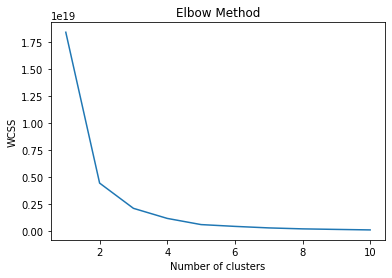

In [82]:
#Elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Text(0.5, 1.0, 'Before K Means Classificaion')

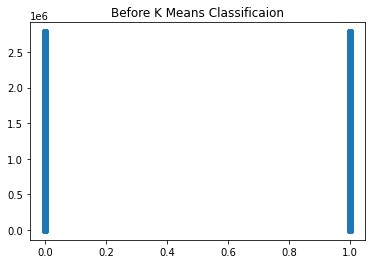

In [84]:
#colors = np.array(["Red","Green","Blue"])
#plt.subplot(1,2,1)
plt.scatter(x=X["Is_Management"],y= range(2776275))
plt.title("Before K Means Classificaion")